<a href="https://colab.research.google.com/github/Gamearonx/Pre-Boot-Camp-2/blob/main/Water_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Random Forest Modeling Script for Water Quality Prediction

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# 1. Load and Explore Dataset
df = pd.read_csv('waterQuality1.csv')
print("Initial Data Shape:", df.shape)
print(df.head())
print(df.info())
print(df.describe())

Initial Data Shape: (7999, 21)
   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  se

In [ ]:
# 2. Handle Missing Values
print("Missing values:\n", df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)

Missing values:
 aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64


In [ ]:
# 3. Encode Categorical Variables
cat_cols = df.select_dtypes(include='object').columns
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

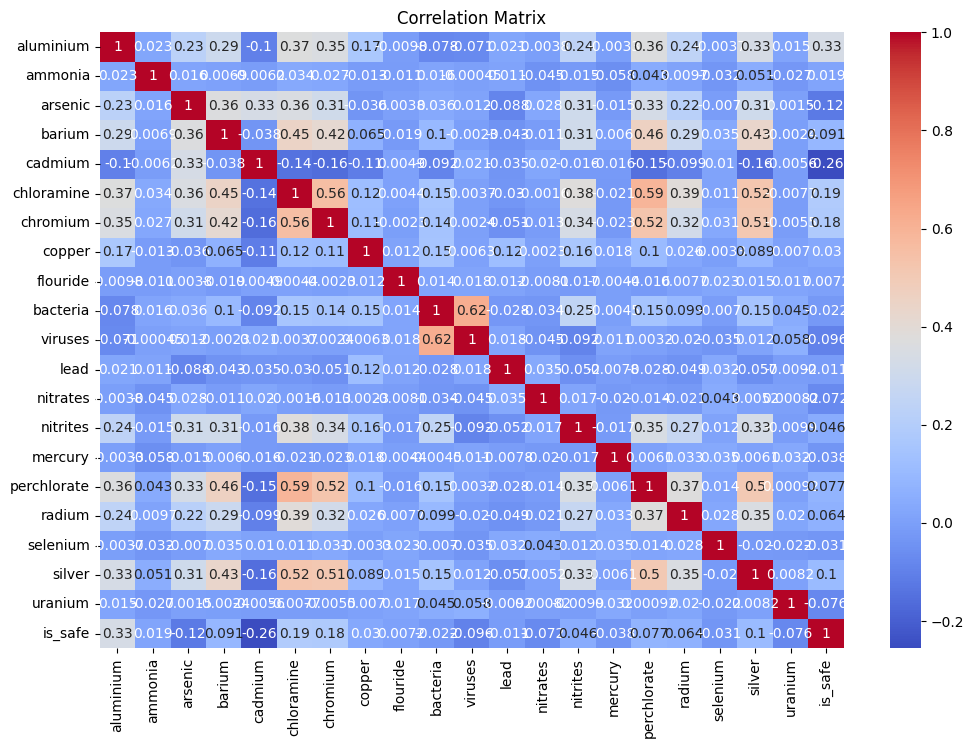

In [ ]:
# 4. Correlation and Visualization (optional)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# 5. Prepare Data for Modeling
# Try to identify the target column based on context
target_col = 'Potability' if 'Potability' in df.columns else df.columns[-1]  # adjust if different

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [8]:
# 6. Build Initial Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=4, criterion='gini', random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=42)

In [9]:

# 7. Evaluate the Model
y_pred = rf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      0.99      0.97      2125
           2       0.91      0.62      0.74       274

    accuracy                           0.95      2400
   macro avg       0.62      0.54      0.57      2400
weighted avg       0.95      0.95      0.95      2400

Confusion Matrix:
 [[   0    1    0]
 [   0 2109   16]
 [   0  104  170]]
Accuracy Score: 0.9495833333333333


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


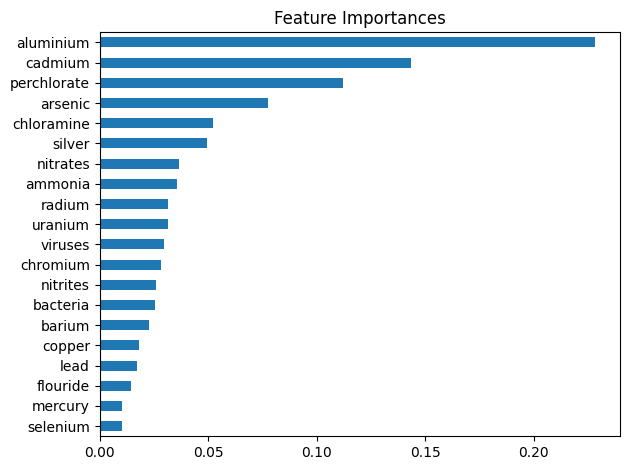

In [10]:
# Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', title='Feature Importances')
plt.tight_layout()
plt.show()

In [12]:
# 8. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 100}


In [13]:
# Final Evaluation with Best Model
y_best_pred = best_model.predict(X_test)
print("Optimized Classification Report:\n", classification_report(y_test, y_best_pred))
print("Optimized Accuracy Score:", accuracy_score(y_test, y_best_pred))

# Cross-validation score
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Optimized Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.95      0.99      0.97      2125
           2       0.91      0.64      0.75       274

    accuracy                           0.95      2400
   macro avg       0.62      0.54      0.57      2400
weighted avg       0.95      0.95      0.95      2400

Optimized Accuracy Score: 0.9504166666666667
Cross-validation Accuracy Scores: [0.229375   0.8975     0.916875   0.935625   0.88617886]
Mean CV Accuracy: 0.7731107723577236
